# **How do we use Flamb ?**

Flamb is a deep learning library that allows us to track the gradient of some variables, and the way we use it is very similar to the way we use PyTorch

## **I) Imports**

In [1]:
import flamb
from flamb import Variable
from flamb import nn
from flamb import functional as F
from tqdm import tqdm
import matplotlib.pyplot as plt
import sys
sys.setrecursionlimit(500000)

## **II) Minimization of simple functions**

### 1) Minimization of f(x) = x²

The gradient of the variables is tracked, and we can use it to develop algorithms like gradient descent.

In [2]:
def f(x):
    return x**2

x = Variable(5, requires_grad=True)
learning_rate = 1e-2

for _ in range(500):        
    loss = f(x)
    loss.backward()
    with flamb.no_grad():
        x -= learning_rate*x.grad
    x.requires_grad = True

print(f"The minimum of the function is {round(f(x).value, 3)} and is obtained with x = {round(x.value, 3)}")

The minimum of the function is 0.0 and is obtained with x = 0.0


It is also possible to use an optimizer defined by Flamb (SGD or Adam for instance)

In [3]:
x = Variable(5, requires_grad=True)
learning_rate = 1e-2
params = flamb.to_tensor([x])
optimizer = flamb.nn.optimizers.SGD(params, learning_rate=learning_rate)

for _ in range(3000):        
    loss = f(x)
    loss.backward()
    optimizer.step()

print(f"The minimum of the function is f({round(x.value, 3)}) = {round(f(x).value, 3)}")

The minimum of the function is f(0.0) = 0.0


### 2) Minimization of g(x, y) = (x + 1)² + (y - 3)²

In [4]:
def g(x, y):
    return (x + 1)**2 + (y - 3)**2

x = Variable(5, requires_grad=True)
y = Variable(2, requires_grad=True)
learning_rate = 1e-2
params = flamb.to_tensor([x, y])
optimizer = flamb.nn.optimizers.Adam(params, learning_rate=learning_rate)

for _ in range(5000):        
    loss = g(x, y)
    loss.backward()
    optimizer.step()


print(f"The minimum of the function is g({round(x.value, 3)}, {round(y.value, 3)}) = {round(g(x, y).value, 3)}")

The minimum of the function is g(-1.0, 3.0) = 0.0


## **III) Deep learning models**

We can create deep learning models, in a very similar way than with PyTorch, and use some optimizers to train them. Here we create a 3-layer feed-forward neural network.  

In [5]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(10, 20)
        self.layer2 = nn.Linear(20, 30)
        self.layer3 = nn.Linear(30, 1)
        self.initialize_parameters()

    def __call__(self, x):
        x = F.ReLU(self.layer1(x))
        x = F.ReLU(self.layer2(x))
        x = self.layer3(x)
        return x

model = Model()

Here the model is trained to return the value 0, when given a list of 1 as input (it is a simple example but it could be a more complex one).  
The loss used is Mean Squared Error (MSE), and the optimizer is Adam.

In [6]:
loss_object = nn.losses.MSE()
optimizer = nn.optimizers.Adam(model.parameters, learning_rate=1e-2)

EPOCHS = 10

losses = []
for epoch in range(EPOCHS):
    print(f"Epoch {epoch+1}/{EPOCHS}")
    total_loss = 0
    for _ in tqdm(range(5)):
        x = flamb.ones((8, 10))
        output = model(x)
        target = flamb.zeros((8, 1))
        loss = loss_object(output, target)
        loss.backward()
        optimizer.step()
        
        total_loss += loss

    losses.append(total_loss.value)
    print(f"Loss : {total_loss}")

Epoch 1/10


100%|██████████| 5/5 [00:01<00:00,  3.17it/s]


Loss : 5.278077587408367
Epoch 2/10


100%|██████████| 5/5 [00:01<00:00,  3.52it/s]


Loss : 2.0211137025982966
Epoch 3/10


100%|██████████| 5/5 [00:01<00:00,  3.24it/s]


Loss : 1.994568024273358
Epoch 4/10


100%|██████████| 5/5 [00:01<00:00,  3.37it/s]


Loss : 1.3256297284150738
Epoch 5/10


100%|██████████| 5/5 [00:01<00:00,  3.39it/s]


Loss : 0.8343167292209481
Epoch 6/10


100%|██████████| 5/5 [00:01<00:00,  3.57it/s]


Loss : 0.44239445074603234
Epoch 7/10


100%|██████████| 5/5 [00:01<00:00,  3.06it/s]


Loss : 0.5160083217384249
Epoch 8/10


100%|██████████| 5/5 [00:01<00:00,  3.42it/s]


Loss : 0.5718220827408336
Epoch 9/10


100%|██████████| 5/5 [00:01<00:00,  3.82it/s]


Loss : 0.3000482736378829
Epoch 10/10


100%|██████████| 5/5 [00:01<00:00,  3.34it/s]

Loss : 0.1285058453990427


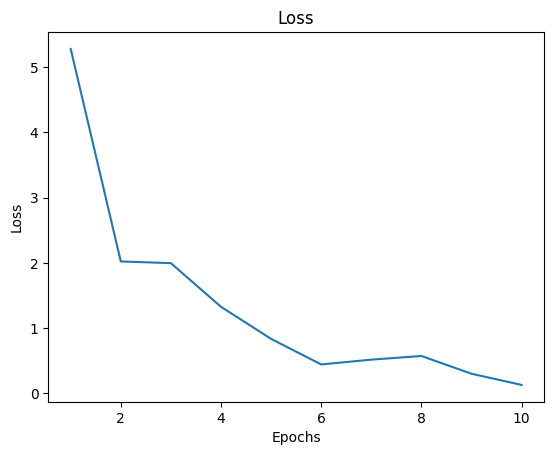

In [7]:
plt.plot([i for i in range(1, EPOCHS+1)], losses)
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()